# Homework 6: Part I

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 3001 divergences after tuning. Increase `target_accept` or reparameterize.
/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.122,0.174,-0.322,0.097,0.087,0.066,4.0,4.0,9.40
betas[1],0.677,0.408,-0.020,0.975,0.203,0.155,4.0,27.0,4.00
betas[2],-1.803,5.046,-12.392,0.866,2.023,1.503,4.0,29.0,3.92
betas[3],-0.237,0.669,-0.952,1.033,0.301,0.227,5.0,4.0,2.59
betas[4],-0.760,0.348,-1.657,-0.306,0.083,0.061,11.0,29.0,2.73
betas[5],0.147,0.621,-0.664,0.932,0.284,0.214,6.0,4.0,2.13
betas[6],-0.537,1.046,-2.215,0.935,0.508,0.387,4.0,30.0,3.84
betas[7],-0.108,0.582,-1.294,0.404,0.227,0.169,6.0,26.0,2.24
betas[8],-2.011,4.727,-12.253,0.748,1.820,1.347,5.0,31.0,3.20
betas[9],0.171,0.619,-0.845,0.861,0.293,0.222,5.0,33.0,2.80


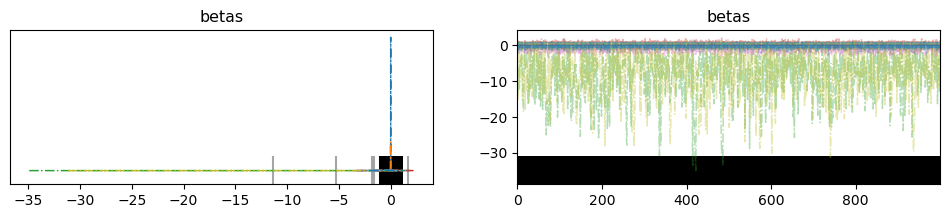

In [11]:
import pymc as pm
import numpy as np
import pandas as pd

data = pd.read_csv('diag_surg_complic.csv')
X = data.drop(columns=['shock']).values
y = data['shock'].values

# Define the logistic function
def invlogit(x):
    return 1 / (1 + np.exp(-x))

# Create the Bayesian logistic regression model
with pm.Model() as BLR:
    # Priors for coefficients
    betas = pm.Normal('betas', mu=0, sigma=10, shape=X.shape[1])
    
    # Linear combination of predictors
    mu = pm.math.dot(X, betas)
    
    # Likelihood (Bernoulli distribution)
    y_obs = pm.Bernoulli('y_obs', p=invlogit(mu), observed=y)
    
    # Sampling
    trace = pm.sample()

# Optional: Assess the performance of the MCMC and check for any issues or warnings
pm.plot_trace(trace)
pm.summary(trace)


# Homework 6: Part II<br>Regularized Loss Functions

To show that the log posterior distributions for $\beta$ using either normal or Laplace prior distributions have analogous forms to the expressions for Lasso and Ridge regression, we can consider the log posterior distributions for $\beta$ using the two types of prior distributions.

Two classic regularizations are "ridge" and "lasso" regression, which respectively use $L_2$ and $L_1$ penalty functions.

**Lasso:**
$
\frac{1}{2}(y - X\beta)^T(y - X\beta) + \lambda \sum_{j=1}^{p} |\beta_j|
$

**Ridge:**
$
\frac{1}{2}(y - X\beta)^T(y - X\beta) + \lambda \sum_{j=1}^{p} \beta_j^2
$


Now, we can consider the log posterior distributions for $\beta$ using normal and Laplace prior distributions.

**Normal Prior Distribution:**
$
\text{log posterior} \propto -\frac{1}{2\sigma^2}||y - X\beta||^2 - \frac{1}{2}\sum_{j=1}^{p} \frac{\beta_j^2}{\tau^2}
$

**Laplace Prior Distribution:**
$
\text{log posterior} \propto -\frac{1}{2\sigma^2}||y - X\beta||^2 - \lambda \sum_{j=1}^{p} |\beta_j|
$

Write down and understand the following: "Bayesians do not optimize posterior distributions, they sample from them; but, the posterior distributions are nonetheless 'regularizations' of the likelihood through the prior."

Bayesian inference involves updating our beliefs (represented by the posterior distribution) about parameters of interest given observed data. Instead of optimizing the posterior distribution directly, Bayesians use sampling methods like Markov chain Monte Carlo (MCMC) to draw samples from the posterior distribution. However, the posterior distribution acts as a form of regularization of the likelihood through the prior. The prior encodes our prior beliefs about the parameters, and by combining it with the likelihood, the posterior distribution reflects a compromise between the prior and the observed data. This regularization effect is similar to the penalty terms in regularized loss functions like Ridge and Lasso regression, which balance the fit to the data with a penalty on the complexity of the model.